## Shortest Remaining Time First Scheduling Preemtive
#### by Isabel Adriatico, Tricia Jonina Alcisto

in this algorithm, the CPU always selects the process with the shortest remaining burst time, preempting the current process if a new process arrives with a shorter remaining time. 

In [20]:
import matplotlib.pyplot as plt

In [21]:
class Process:
    def __init__(self, pid, arrival_time, burst_time):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time 
        self.completion_time = 0
        self.turnaround_time = 0
        self.waiting_time = 0
        self.start_time = None

Enter the number of processes:  4
Enter arrival time for process A:  0
Enter burst time for process A:  3
Enter arrival time for process B:  3
Enter burst time for process B:  7
Enter arrival time for process C:  2
Enter burst time for process C:  9
Enter arrival time for process D:  6
Enter burst time for process D:  8


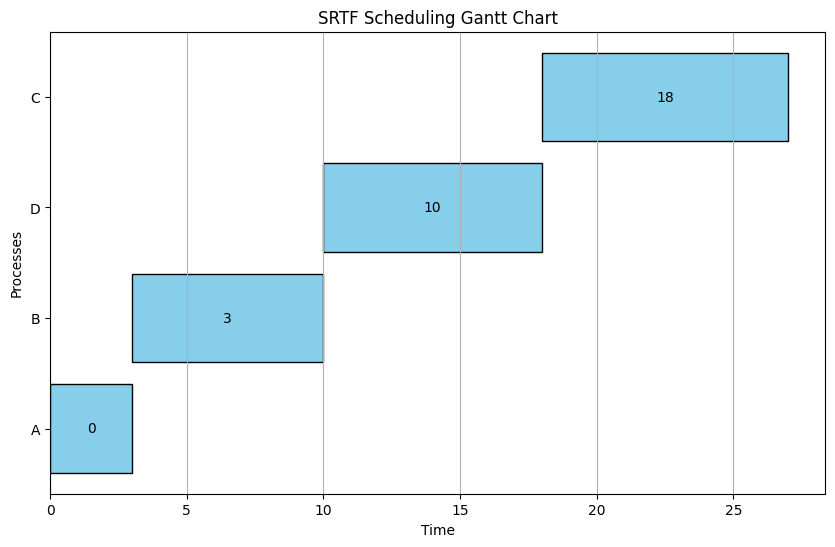


Process Summary:
Process	Arrival Time	Burst Time	Completion Time	Turnaround Time	Waiting Time
A	0		3		3		3		0
B	3		7		10		7		0
D	6		8		18		12		4
C	2		9		27		25		16

Average Waiting Time: 5.00 ms


In [22]:
def calculate_srtf(processes):
    processes.sort(key=lambda x: x.arrival_time) 
    current_time = 0
    completed_processes = []
    while any(p.remaining_time > 0 for p in processes): 
        ready_queue = [p for p in processes if p.arrival_time <= current_time and p.remaining_time > 0]
        
        if ready_queue:
            shortest_job = min(ready_queue, key=lambda x: x.remaining_time)
            
            if shortest_job.start_time is None:
                shortest_job.start_time = current_time

            shortest_job.remaining_time -= 1
            current_time += 1
            
            if shortest_job.remaining_time == 0: 
                shortest_job.completion_time = current_time
                shortest_job.turnaround_time = shortest_job.completion_time - shortest_job.arrival_time
                shortest_job.waiting_time = shortest_job.turnaround_time - shortest_job.burst_time
                completed_processes.append(shortest_job)
        else:
            current_time += 1 

    return completed_processes

def display_gantt_chart(processes):
    start_times = []
    process_names = []
    for process in processes:
        start_times.append(process.start_time)
        process_names.append(process.pid)
    
    plt.figure(figsize=(10, 6))
    plt.barh(process_names, [p.burst_time for p in processes], left=start_times, color='skyblue', edgecolor='black')
    plt.xlabel("Time")
    plt.ylabel("Processes")
    plt.title("SRTF Scheduling Gantt Chart")
    plt.grid(axis='x')
    
    for i, process in enumerate(processes):
        plt.text(start_times[i] + process.burst_time / 2, i, str(start_times[i]), ha='center', va='center', color='black')
    
    plt.show()

def print_process_summary(processes):
    print("\nProcess Summary:")
    print("Process\tArrival Time\tBurst Time\tCompletion Time\tTurnaround Time\tWaiting Time")
    for process in processes:
        print(f"{process.pid}\t{process.arrival_time}\t\t{process.burst_time}\t\t{process.completion_time}\t\t{process.turnaround_time}\t\t{process.waiting_time}")

def calculate_average_waiting_time(processes):
    total_waiting_time = sum(process.waiting_time for process in processes)
    average_waiting_time = total_waiting_time / len(processes)
    return average_waiting_time

def main():
    processes = []
    n = int(input("Enter the number of processes: "))
    
    for i in range(n):
        pid = chr(65 + i) 
        arrival_time = int(input(f"Enter arrival time for process {pid}: "))
        burst_time = int(input(f"Enter burst time for process {pid}: "))
        processes.append(Process(pid, arrival_time, burst_time))

    completed_processes = calculate_srtf(processes)
    display_gantt_chart(completed_processes)
    print_process_summary(completed_processes)

    avg_waiting_time = calculate_average_waiting_time(completed_processes)
    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f} ms")

if __name__ == "__main__":
    main()
